In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

df=pd.read_csv("Solar PV HIT-data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18581 entries, 0 to 18580
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time          18581 non-null  object 
 1   ModuleYear    18581 non-null  int64  
 2   ModuleMonth   18581 non-null  int64  
 3   module        18581 non-null  object 
 4   Isc           18410 non-null  float64
 5   Voc           18410 non-null  float64
 6   Ipmax         18410 non-null  float64
 7   Vpmax         18410 non-null  float64
 8   Pmax          18410 non-null  float64
 9   Temp_Mid_avg  18581 non-null  float64
 10  Gt            18581 non-null  float64
 11  WS            18581 non-null  float64
 12  Tamb          18581 non-null  float64
dtypes: float64(9), int64(2), object(2)
memory usage: 1.8+ MB


In [6]:
df.head()

,time,ModuleYear,ModuleMonth,module,Isc,Voc,Ipmax,Vpmax,Pmax,Temp_Mid_avg,Gt,WS,Tamb
0,1/1/10 8:10,2010,1,S20_REV205,0.500,74.75,0.490,62.35,31.0,6.533,135.4240,0.684,8.26
1,1/1/10 8:20,2010,1,S20_REV205,0.658,73.22,0.628,62.75,39.0,9.270,174.8295,0.493,8.75
2,1/1/10 8:30,2010,1,S20_REV205,0.795,72.98,0.751,63.38,48.0,11.480,208.2349,0.694,9.29
3,1/1/10 8:40,2010,1,S20_REV205,0.926,75.29,0.860,64.14,55.0,13.010,244.6055,0.864,9.76
4,1/1/10 8:50,2010,1,S20_REV205,1.056,74.98,1.009,63.42,64.0,15.240,275.6980,0.611,10.22


In [7]:
df.tail()

,time,ModuleYear,ModuleMonth,module,Isc,Voc,Ipmax,Vpmax,Pmax,Temp_Mid_avg,Gt,WS,Tamb
18576,12/31/10 16:00,2010,12,S20_REV205,0.932,73.75,0.832,64.70,54.0,21.06,281.0977,1.958,15.62
18577,12/31/10 16:10,2010,12,S20_REV205,0.687,71.45,0.621,63.52,39.0,20.56,229.2695,2.020,15.29
18578,12/31/10 16:20,2010,12,S20_REV205,0.677,71.52,0.623,63.20,39.0,18.30,214.2968,2.555,15.05
18579,12/31/10 16:30,2010,12,S20_REV205,0.677,73.52,0.617,63.17,39.0,19.55,190.5222,1.437,15.24
18580,12/31/10 16:40,2010,12,S20_REV205,0.380,70.14,0.345,62.59,22.0,17.13,121.3394,1.924,14.81


In [8]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

ModuleNotFoundError: No module named 'seaborn'

In [9]:
dataset=pd.DataFrame(df)
cols=[4,5]
dataset=dataset[dataset.columns[cols]]
dataset.info()

#Multiplying the values of Isc (Short circuit current) and Voc(Open circuit voltage)
df1=dataset.assign(result=dataset.Isc*dataset.Voc)
print (df1)


#Finding the value of FF(Fill factor) by dividing the Isc and Voc by Pmax(Maxiumum power point)

df2=df1.assign(FF=df.Pmax/dataset.Isc*dataset.Voc)
print(df2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18581 entries, 0 to 18580
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Isc     18410 non-null  float64
 1   Voc     18410 non-null  float64
dtypes: float64(2)
memory usage: 290.5 KB
         Isc    Voc    result
0      0.500  74.75  37.37500
1      0.658  73.22  48.17876
2      0.795  72.98  58.01910
3      0.926  75.29  69.71854
4      1.056  74.98  79.17888
...      ...    ...       ...
18576  0.932  73.75  68.73500
18577  0.687  71.45  49.08615
18578  0.677  71.52  48.41904
18579  0.677  73.52  49.77304
18580  0.380  70.14  26.65320

[18581 rows x 3 columns]
         Isc    Voc    result           FF
0      0.500  74.75  37.37500  4634.500000
1      0.658  73.22  48.17876  4339.787234
2      0.795  72.98  58.01910  4406.339623
3      0.926  75.29  69.71854  4471.868251
4      1.056  74.98  79.17888  4544.242424
...      ...    ...       ...          ...
18576  0.932  7

In [10]:
df.insert(13, 'FF',df2['FF'])

In [11]:
df.head()


,time,ModuleYear,ModuleMonth,module,Isc,Voc,Ipmax,Vpmax,Pmax,Temp_Mid_avg,Gt,WS,Tamb,FF
0,1/1/10 8:10,2010,1,S20_REV205,0.500,74.75,0.490,62.35,31.0,6.533,135.4240,0.684,8.26,4634.500000
1,1/1/10 8:20,2010,1,S20_REV205,0.658,73.22,0.628,62.75,39.0,9.270,174.8295,0.493,8.75,4339.787234
2,1/1/10 8:30,2010,1,S20_REV205,0.795,72.98,0.751,63.38,48.0,11.480,208.2349,0.694,9.29,4406.339623
3,1/1/10 8:40,2010,1,S20_REV205,0.926,75.29,0.860,64.14,55.0,13.010,244.6055,0.864,9.76,4471.868251
4,1/1/10 8:50,2010,1,S20_REV205,1.056,74.98,1.009,63.42,64.0,15.240,275.6980,0.611,10.22,4544.242424


## MODELING Using Random Forest Regressor



In [81]:
# random regressor doesn't take NaNs so replace them

df.isnull().sum()
df.fillna(0, inplace=True)

In [82]:
#split x and y

x = df.drop(['Temp_Mid_avg','Isc','Voc','Ipmax','Vpmax','Pmax','time','ModuleYear','ModuleMonth','module'], axis=1)
y = df['Temp_Mid_avg']

In [83]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [84]:
# Fitting Random Forest Regression to the Training set

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)

In [85]:
#Fit (train) the model
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

In [17]:
X_train.head()

,Gt,WS,Tamb
13404,186.0443,1.842,21.15
6226,501.9459,0.969,34.56
11982,259.9785,0.872,30.06
776,114.8557,0.123,9.46
1969,303.4869,1.944,23.29


In [18]:
y_train.head()

13404    23.10
6226     47.39
11982    49.53
776      13.25
1969     33.64
Name: Temp_Mid_avg, dtype: float64

In [86]:
# Predicting the Test set results

y_pred = regressor.predict(X_test)

In [20]:
# Evaluating the Algorithm

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.0536064098148943
Mean Squared Error: 16.046054801269136
Root Mean Squared Error: 4.005752713444645


In [21]:
regressor = RandomForestRegressor(n_estimators = 40, random_state = 0)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.0537874623331893
Mean Squared Error: 16.057429670356488
Root Mean Squared Error: 4.007172278597027


In [22]:
regressor = RandomForestRegressor(n_estimators = 26, random_state = 0)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.0645173515679325
Mean Squared Error: 16.251041361161345
Root Mean Squared Error: 4.031258037035256


In [23]:
df['date'] = pd.date_range(start='1/1/2010', periods=len(df), freq='8H')

In [24]:

y_test.sort_index().rolling(40).mean().shape, df.rolling(40).mean().shape

/tmp/ipykernel_1799/821852433.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date', 'module', 'time'], dtype='object')
  y_test.sort_index().rolling(40).mean().shape, df.rolling(40).mean().shape


((4646,), (18581, 12))

In [25]:
datetime = pd.date_range(start='1/1/2010', periods=730, freq='8H')

In [26]:
#Actual value and the predicted value
diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
diff.head()


,Actual value,Predicted value
11632,44.540,38.933077
13860,47.430,47.369231
9643,63.530,61.840385
17125,7.205,13.653769
7054,54.540,52.884615


In [27]:
plt.plot(diff['Predicted value'].rolling(40).mean(), diff['Actual value'].rolling(40).mean(), 'o')
plt.title('Actual vs Predicted Module Temperature')
plt.xlabel('Predicted Module Temperature (Celcius)')
plt.ylabel('Actual Module Temperature (Celcius)')

NameError: name 'plt' is not defined

In [ ]:
s = pd.Series(y_pred)
plt.plot(s.rolling(40).mean()) 

In [ ]:
#38.933077 = a*186.0443 + b*1.842 + c*21.15 + d

#47.369231 = a*501.9459 + b*0.969 + c*34.56 + d

#61.840385 = a*259.9785 + b*0.872 + c*30.06 + d

#13.653769 = a*114.8557 + b*0.123 + c*9.46 + d

A = np.array([[186.0443,1.842,21.15,1],[501.9459,0.969,34.56,1],[259.9785,0.872,30.06,1],[114.8557,0.123,9.46,1]])
B = np.array([38.933077,47.369231,61.840385,13.653769])
X2=np.linalg.solve(A,B)
print(X2)

In [ ]:
#E = PV electrical efficiency
#ETref = Module's electrical efficiency
#Bref = Temperature coefficient
#Tref = Reference temperature
#Tc = Module temperature 

# E=ETref[1-Bref(Tc-Tref)]

#E=0.12[1-0.0045*(38.933077-25)]
#E=0.12[1-0.0045*(47.369231-25)]
#E=0.12[1-0.0045*(61.840385-25)]
#E=0.12[1-0.0045*(13.653769-25)]


### Efficiency and power

In [ ]:
# Create a pandas DataFrame with the values to calculate E
data = pd.DataFrame({'values': [38.933077, 47.369231, 61.840385, 13.653769]})

# Define a lambda function to calculate E using the formula
calculate_E = lambda x: 0.12*(1 - 0.0045*(x - 25))

# Apply the lambda function to each row of the DataFrame and store the result in a new column
data['E'] = data['values'].apply(calculate_E)

# Print the resulting DataFrame
print(data)


In [ ]:
#To Expression for power output : P=EAGt

# P=  0.112476*1.05*186.0443
# P=  0.107921*1.05*501.9459
# P=  0.100106*1.05*259.9785
# p=  0.126127*1.05*114.8557


In [ ]:
S=pd.DataFrame({'coeff': [0.112476, 0.107921, 0.100106, 0.126127], 'factor': [1.05, 1.05, 1.05, 1.05], 'value': [186.0443, 501.9459, 259.9785, 114.8557]})

calculate_P = lambda x: x['coeff']*x['factor']*x['value']

S['P'] = S.apply(calculate_P, axis=1)

print(S)

## Modeling with SVR

In [91]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [92]:
df = pd.read_csv('Solar PV HIT-data.csv')

In [93]:
#split x and y

x = df.drop(columns=['Temp_Mid_avg','Isc','Voc','Ipmax','Vpmax','Pmax','time','ModuleYear','ModuleMonth','module']).values
y = df['Temp_Mid_avg'].values

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [35]:
x

array([[135.424 ,   0.684 ,   8.26  ],
       [174.8295,   0.493 ,   8.75  ],
       [208.2349,   0.694 ,   9.29  ],
       ...,
       [214.2968,   2.555 ,  15.05  ],
       [190.5222,   1.437 ,  15.24  ],
       [121.3394,   1.924 ,  14.81  ]])

In [95]:
# Scale the features using standardization
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [96]:
# Create the SVR model
svr = SVR(kernel='linear')

In [97]:
# Train the SVR model
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [98]:
y_pred = svr.predict(X_test)

In [ ]:
y_test = y_test[:len(y_pred)]

In [43]:
# Evaluate the performance of the model using metrics (e.g., mean squared error)
from sklearn.metrics import mean_squared_error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.192123862806484
Mean Squared Error: 17.785714242689618
Root Mean Squared Error: 4.21731125750633


In [44]:
svr = SVR(kernel='rbf')

svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
y_test = y_test[:len(y_pred)]


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.890580237852462
Mean Squared Error: 15.033823573698754
Root Mean Squared Error: 3.8773474919974293


In [45]:
svr = SVR(kernel='poly')

svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
y_test = y_test[:len(y_pred)]


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.924238853974263
Mean Squared Error: 41.27404602690031
Root Mean Squared Error: 6.424487997257081


In [ ]:
df['date'] = pd.date_range(start='1/1/2010', periods=len(df), freq='8H')

In [ ]:
y_test = pd.Series(y_test)
y_test.sort_index().rolling(40).mean().shape, df.rolling(40).mean().shape

In [ ]:
datetime = pd.date_range(start='1/1/2010', periods=730, freq='8H')

In [ ]:
#Actual value and the predicted value
diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
diff.head()

In [ ]:
plt.plot(diff['Predicted value'].rolling(40).mean(), diff['Actual value'].rolling(40).mean(), 'o')
plt.title('Actual vs Predicted Module Temperature')
plt.xlabel('Predicted Module Temperature (Celcius)')
plt.ylabel('Actual Module Temperature (Celcius)')

In [ ]:
s = pd.Series(y_pred)
plt.plot(s.rolling(40).mean()) 

In [ ]:
# Evaluate the model using cross-validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X_train, y_train, cv=5)
print("Accuracy: {:.2f} %".format(scores.mean() * 100))

In [ ]:
#31.543277 = a*186.0443 + b*1.842 + c*21.15 + d

#333.290699 = a*501.9459 + b*0.969 + c*34.56 + d

#713.789627 = a*259.9785 + b*0.872 + c*30.06 + d

#1845.903896 = a*114.8557 + b*0.123 + c*9.46 + d

A = np.array([[186.0443,1.842,21.15,1],[501.9459,0.969,34.56,1],[259.9785,0.872,30.06,1],[114.8557,0.123,9.46,1]])
B = np.array([31.543277,333.290699, 713.789627, 1845.903896 ])
X2=np.linalg.solve(A,B)
print(X2)

In [ ]:
#E = PV electrical efficiency
#ETref = Module's electrical efficiency
#Bref = Temperature coefficient
#Tref = Reference temperature
#Tc = Module temperature 

# E=ETref[1-Bref(Tc-Tref)]

# Create a pandas DataFrame with the values to calculate E
data = pd.DataFrame({'values': [31.543277,333.290699, 713.789627, 1845.903896]})

# Define a lambda function to calculate E using the formula
calculate_E = lambda x: 0.12*(1 - 0.0045*(x - 25))

# Apply the lambda function to each row of the DataFrame and store the result in a new column
data['E'] = data['values'].apply(calculate_E)

# Print the resulting DataFrame
print(data)

In [ ]:
#To Expression for power output : P=EAGt

# P=   0.116467*1.05*186.0443
# P=  -0.046477*1.05*501.9459
# P=  -0.251946*1.05*259.9785
# p=  -0.863288*1.05*114.8557

S=pd.DataFrame({'coeff': [0.116467,-0.046477, -0.251946, -0.863288], 'factor': [1.05, 1.05, 1.05, 1.05], 'value': [186.0443, 501.9459, 259.9785, 114.8557]})

calculate_P = lambda x: x['coeff']*x['factor']*x['value']

S['P'] = S.apply(calculate_P, axis=1)

print(S)


## Modeling using KNN

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [107]:
# Load the dataset
data = pd.read_csv('Solar PV HIT-data.csv')

In [108]:
# Split the dataset into training and test sets
X = data.drop(['Temp_Mid_avg','Isc','Voc','Ipmax','Vpmax','Pmax','time','ModuleYear','ModuleMonth','module'], axis=1)
y = data['Temp_Mid_avg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [109]:
# Train the KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [110]:
# Predict on the test set
y_pred = knn.predict(X_test)

In [111]:
# Evaluate the performance of the model using metrics (e.g., mean squared error)

from sklearn.metrics import mean_squared_error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.3078777508743613
Mean Squared Error: 18.808734385730425
Root Mean Squared Error: 4.336903778703238


In [52]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.4961573849878933
Mean Squared Error: 21.02387537539234
Root Mean Squared Error: 4.585179971974092


In [53]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.2407757792382488
Mean Squared Error: 17.970060477491725
Root Mean Squared Error: 4.239110812126963


In [54]:
df['date'] = pd.date_range(start='1/1/2010', periods=len(df), freq='8H')

In [55]:
datetime = pd.date_range(start='1/1/2010', periods=730, freq='8H')

In [56]:
#Actual value and the predicted value
diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
diff.head()

,Actual value,Predicted value
9394,55.23,56.427143
14845,53.09,50.772857
11368,54.10,39.620000
9871,30.56,33.514286
10376,43.05,45.172857


In [57]:
plt.plot(diff['Predicted value'].rolling(40).mean(), diff['Actual value'].rolling(40).mean(), 'o')
plt.title('Actual vs Predicted Module Temperature')
plt.xlabel('Predicted Module Temperature (Celcius)')
plt.ylabel('Actual Module Temperature (Celcius)')

NameError: name 'plt' is not defined

In [ ]:
s = pd.Series(y_pred)
plt.plot(s.rolling(40).mean()) 

In [ ]:

# Evaluate the model using cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5)
mean_cv_score = cv_scores.mean()

print("Cross-validation scores: {}".format(cv_scores))
print("Mean cross-validation score: {:.2f}".format(mean_cv_score))


In [ ]:
#56.427143 = a*186.0443 + b*1.842 + c*21.15 + d

#50.772857 = a*501.9459 + b*0.969 + c*34.56 + d

#39.620000= a*259.9785 + b*0.872 + c*30.06 + d

#33.514286 = a*114.8557 + b*0.123 + c*9.46 + d

A = np.array([[186.0443,1.842,21.15,1],[501.9459,0.969,34.56,1],[259.9785,0.872,30.06,1],[114.8557,0.123,9.46,1]])
B = np.array([56.427143, 50.772857, 39.620000,33.514286  ])
X2=np.linalg.solve(A,B)
print(X2)

In [ ]:
#E = PV electrical efficiency
#ETref = Module's electrical efficiency
#Bref = Temperature coefficient
#Tref = Reference temperature
#Tc = Module temperature 

# E=ETref[1-Bref(Tc-Tref)]

# Create a pandas DataFrame with the values to calculate E
data = pd.DataFrame({'values': [56.427143, 50.772857, 39.620000,33.514286 ]})

# Define a lambda function to calculate E using the formula
calculate_E = lambda x: 0.12*(1 - 0.0045*(x - 25))

# Apply the lambda function to each row of the DataFrame and store the result in a new column
data['E'] = data['values'].apply(calculate_E)

# Print the resulting DataFrame
print(data)

In [ ]:
#To Expression for power output : P=EAGt

# P=  0.103029*1.05*186.0443
# P=  0.106083*1.05*501.9459
# P= 0.112105 *1.05*259.9785
# p=  0.126127*1.05*114.8557

S=pd.DataFrame({'coeff': [0.103029,0.106083, 0.112105,  0.115402  ], 'factor': [1.05, 1.05, 1.05, 1.05], 'value': [186.0443, 501.9459, 259.9785, 114.8557]})

calculate_P = lambda x: x['coeff']*x['factor']*x['value']

S['P'] = S.apply(calculate_P, axis=1)

print(S)

In [58]:
X_test

,Gt,WS,Tamb
9394,625.5485,2.373,40.09
14845,638.2452,0.751,28.54
11368,258.0542,1.299,32.97
9871,179.7936,1.000,27.70
10376,421.5381,3.739,31.72
...,...,...,...
2857,871.6236,1.690,30.02
16678,747.7057,1.173,21.43
10325,848.9891,1.872,34.55
11616,283.3823,1.111,32.41


## Modeling using Gradient Boosting

In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset
data = pd.read_csv('Solar PV HIT-data.csv')

In [3]:

# Split the dataset into training and test sets
X = data.drop(['Temp_Mid_avg','Isc','Voc','Ipmax','Vpmax','Pmax','time','ModuleYear','ModuleMonth','module'], axis=1)
y = data['Temp_Mid_avg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Train the model
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [14]:
list(X_train['Gt'][:40].sort_index())

[547.0397,
 635.7053,
 749.927,
 468.5551,
 962.8691,
 747.8853,
 579.7453,
 717.4138,
 371.5115,
 492.6956,
 123.1018,
 595.7877,
 835.1508,
 129.4151,
 249.8679,
 692.0901,
 841.9402,
 488.3485,
 239.6332,
 299.2595,
 251.5114,
 526.9993,
 745.831,
 143.5099,
 880.3419,
 833.1104,
 404.7763,
 387.8777,
 513.3343,
 816.2168,
 246.1607,
 558.607,
 326.4332,
 701.9807,
 425.2198,
 797.7455,
 190.8123,
 198.5034,
 157.6119,
 340.4061]

In [ ]:
import pickle

Gt = pickle.dump(open('gt', 'wb'))

In [6]:
# Predicting the Test set results

y_pred = gb.predict(X_test)

In [7]:
# Evaluating the Algorithm

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.9457695764126526
Mean Squared Error: 15.006865339400836
Root Mean Squared Error: 3.873869556322313


In [ ]:
gb = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
df['date'] = pd.date_range(start='1/1/2010', periods=len(df), freq='8H')

In [ ]:
datetime = pd.date_range(start='1/1/2010', periods=730, freq='8H')

In [ ]:
#Actual value and the predicted value
diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
diff.head()

In [ ]:
plt.plot(diff['Predicted value'].rolling(40).mean(), diff['Actual value'].rolling(40).mean(), 'o')
plt.title('Actual vs Predicted Module Temperature')
plt.xlabel('Predicted Module Temperature (Celcius)')
plt.ylabel('Actual Module Temperature (Celcius)')

In [ ]:
s = pd.Series(y_pred)
plt.plot(s.rolling(40).mean()) 

In [ ]:
#55.468208 = a*186.0443 + b*1.842 + c*21.15 + d

#49.396756 = a*501.9459 + b*0.969 + c*34.56 + d

#42.849564 = a*259.9785 + b*0.872 + c*30.06 + d

#32.989956 = a*114.8557 + b*0.123 + c*9.46 + d

A = np.array([[186.0443,1.842,21.15,1],[501.9459,0.969,34.56,1],[259.9785,0.872,30.06,1],[114.8557,0.123,9.46,1]])
B = np.array([55.468208, 49.396756, 42.849564, 32.989956 ])
X2=np.linalg.solve(A,B)
print(X2)

In [ ]:
#E = PV electrical efficiency
#ETref = Module's electrical efficiency
#Bref = Temperature coefficient
#Tref = Reference temperature
#Tc = Module temperature 

# E=ETref[1-Bref(Tc-Tref)]

# Create a pandas DataFrame with the values to calculate E
data = pd.DataFrame({'values': [55.468208, 49.396756, 42.849564, 32.989956]})

# Define a lambda function to calculate E using the formula
calculate_E = lambda x: 0.12*(1 - 0.0045*(x - 25))

# Apply the lambda function to each row of the DataFrame and store the result in a new column
data['E'] = data['values'].apply(calculate_E)

# Print the resulting DataFrame
print(data)

In [63]:
X_test['Gt']

9394     625.5485
14845    638.2452
11368    258.0542
9871     179.7936
10376    421.5381
           ...   
2857     871.6236
16678    747.7057
10325    848.9891
11616    283.3823
15590    637.4999
Name: Gt, Length: 3717, dtype: float64

In [120]:
X_test

,Gt,WS,Tamb
9394,625.5485,2.373,40.09
14845,638.2452,0.751,28.54
11368,258.0542,1.299,32.97
9871,179.7936,1.000,27.70
10376,421.5381,3.739,31.72
...,...,...,...
2857,871.6236,1.690,30.02
16678,747.7057,1.173,21.43
10325,848.9891,1.872,34.55
11616,283.3823,1.111,32.41


In [121]:
calculate_E = lambda x: 0.12*(1 - 0.0045*(x - 25))
y_pred = pd.Series(y_pred)
E_pred_gb = y_pred.apply(calculate_E)

P_pred_gb = 1.05 * E_pred_gb * X_test['Gt']

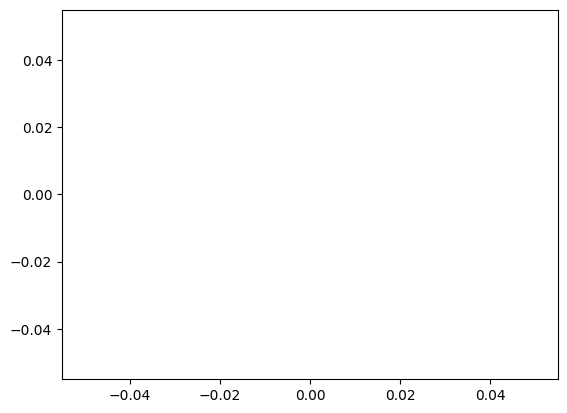

In [126]:
#plt.plot(np.arange(len(P_pred_rf)), P_pred_rf.rolling(90).mean(), label="Random forest")
#plt.plot(np.arange(len(P_pred_svr)), P_pred_svr.rolling(90).mean(), label="SVR")
#plt.plot(np.arange(len(P_pred_knn)), P_pred_knn.rolling(90).mean(), label="KNN")
plt.plot(np.arange(len(P_pred_gb)), P_pred_gb.rolling(90).mean(), label="Gradient boost")

In [87]:
y_pred = pd.Series(y_pred)
y_test = pd.Series(y_test)
calculate_E = lambda x: 0.12*(1 - 0.0045*(x - 25))
E_pred_rf = y_pred.apply(calculate_E)
E_test_rf = y_test.apply(calculate_E)
P_pred_rf = 1.05 * E_pred_rf * X_test['Gt']
P_test_rf = 1.05 * E_test_rf * X_test['Gt']

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

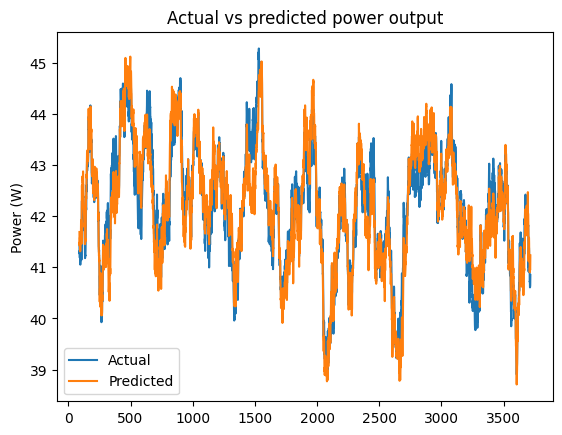

In [88]:
P_pred = pd.Series(P_pred)
P_test = pd.Series(P_test)
plt.plot(np.arange(len(P_test)), P_test.rolling(90).mean(), label="Actual")
plt.plot(np.arange(len(P_test)), P_pred.rolling(90).mean(), label="Predicted")
plt.ylabel("Power (W)")
plt.title("Actual vs predicted power output")
plt.legend()

In [ ]:
#To Expression for power output : P=EAGt

# P= 0.103547*1.05*186.0443
# P= 0.106826*1.05*501.9459
# P= 0.110361 *1.05*259.9785
# p= 0.115685*1.05*114.8557

S=pd.DataFrame({'coeff': [0.103547, 0.106826, 0.110361, 0.115685 ], 'factor': [1.05, 1.05, 1.05, 1.05], 'value': [186.0443, 501.9459, 259.9785, 114.8557]})

calculate_P = lambda x: x['coeff']*x['factor']*x['value']

S['P'] = S.apply(calculate_P, axis=1)

print(S)

In [4]:
import matplotlib.pyplot as plt

In [19]:
y_test.shape

(4646,)

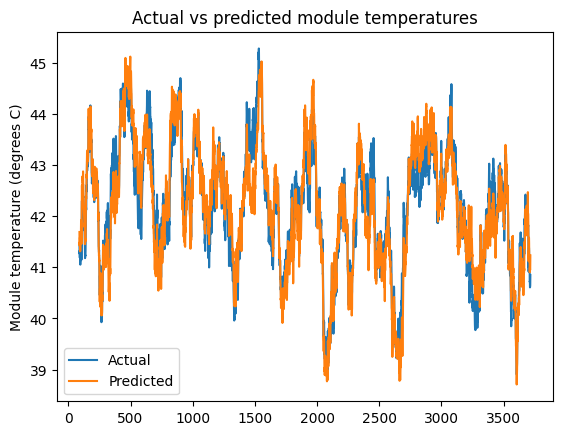

In [58]:
y_pred = pd.Series(y_pred)
y_test = pd.Series(y_test)
plt.plot(np.arange(len(y_test)), y_test.rolling(90).mean(), label="Actual")
plt.plot(np.arange(len(y_test)), y_pred.rolling(90).mean(), label="Predicted")
plt.ylabel("Module temperature (degrees C)")
plt.title("Actual vs predicted module temperatures")
plt.legend()

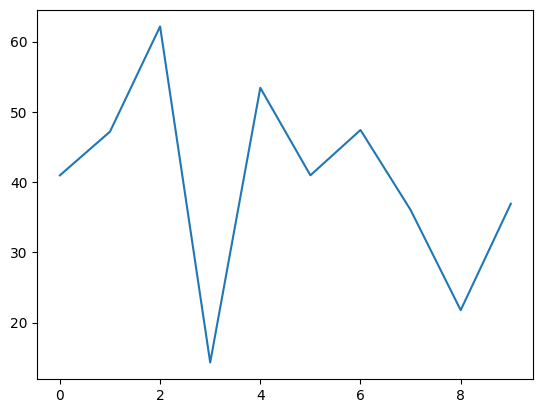

In [16]:
plt.plot(y_pred[:10])

## Solar irradiance 

In [67]:
sol_df1 = pd.read_csv("POWER_Regional_Daily_20210101_20211231_015d0431N_025d0431N_072d6387E_082d6387E_LST.csv")
sol_df2 = pd.read_csv("POWER_Regional_Daily_20220101_20221231_015d0431N_025d0431N_072d6387E_082d6387E_LST.csv")
sol_df = pd.concat([sol_df1, sol_df2])

In [69]:
X = sol_df[["LAT", "LON"]]
y = sol_df["ALLSKY_SFC_LW_DWN"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
y.head()

0    418.16
1    411.42
2    411.42
3    376.52
4    376.52
Name: ALLSKY_SFC_LW_DWN, dtype: float64

In [ ]:
from sklearn.neural_network import MLPRegressor



In [78]:
# Train the KNN model
knn = KNeighborsRegressor(n_neighbors=16)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

In [79]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 36.532884514126714
Mean Squared Error: 1892.2537161558553
Root Mean Squared Error: 43.50004271441415
